<a href="https://colab.research.google.com/github/Patatims/CCINSYSL_ASSIGNMENT_COM-DF211/blob/main/exercise_5_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5 B

In [99]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [100]:
faces = fetch_olivetti_faces()

In [101]:
faces.data.shape

(400, 4096)

In [102]:
faces.images.shape

(400, 64, 64)

In [103]:
faces.target.shape

(400,)

In [104]:
faces.target[200]

20

#### 1. Plot the image of index zero

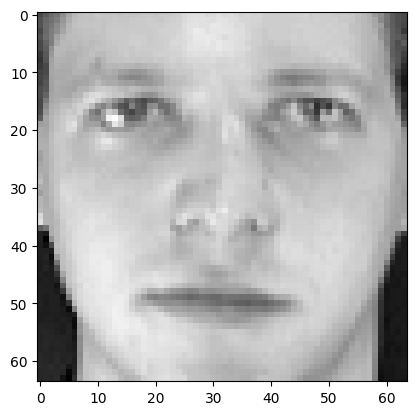

In [105]:
plt.imshow(faces.images[0], cmap='gray')
plt.show()

#### 2. Create a subplot of 10 images in a 3x3 configuration

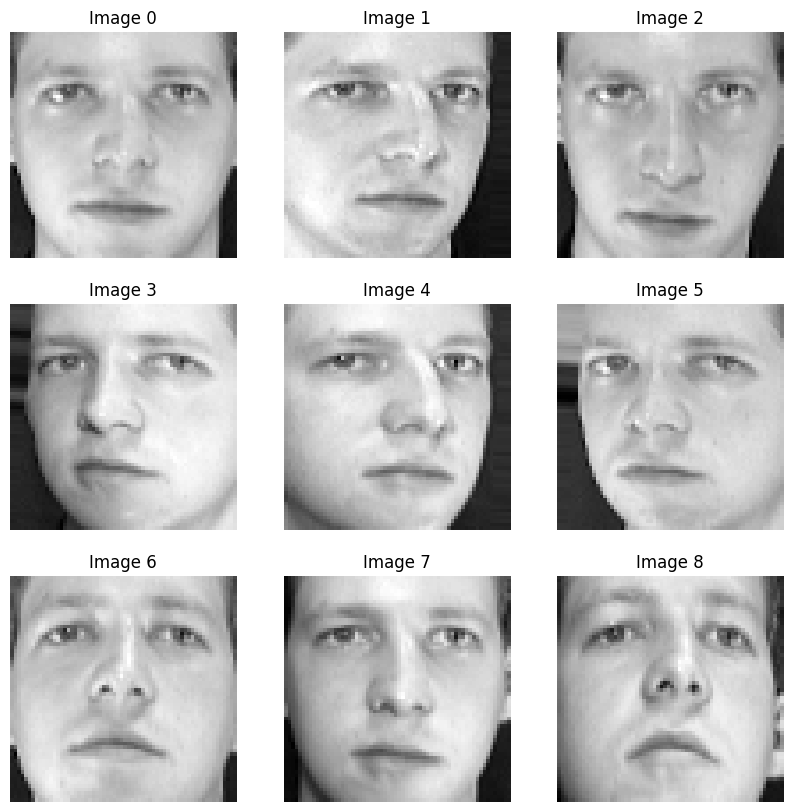

In [106]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
axs = axs.flatten()
for i in range(9):
    axs[i].imshow(faces.images[i], cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"Image {i}")
plt.show()


#### 3. Split the data into a training and test set

In [107]:
train_img, test_img, train_lbl, test_lbl = train_test_split(faces.data, faces.target, test_size=1/7.0, random_state=0)

print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)


(342, 4096)
(342,)
(58, 4096)
(58,)


#### 4. Create a new instance of the LogisticRegression class

In [108]:
logisticRegr = LogisticRegression()


#### 5. Train the model using the training set using the `fit()` function

In [109]:
logisticRegr.fit(train_img, train_lbl)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 6. Use the test data to test the model using the `predict()` function

In [110]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))
logisticRegr.predict(test_img[0:10])

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21])

In [111]:
# Make predictions on entire test data
predictions = logisticRegr.predict(test_img)

#### 7. Get the accuracy using the `score()` function

In [112]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9655172413793104


#### 8. Collect all the misclassified images and create a plot for visualization

In [113]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1


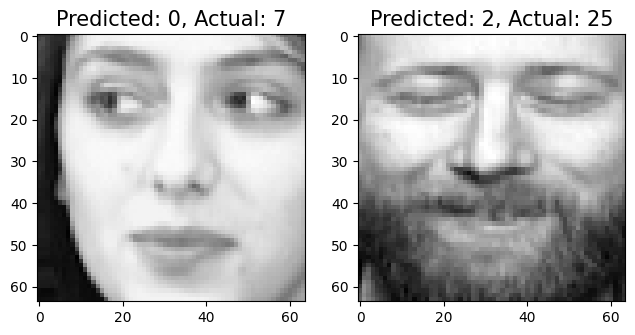

In [114]:
plt.figure(figsize=(20,8))  #size of display
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (64,64)), cmap=plt.cm.gray)  #64x64 = 4096 po since the array size is 4096, using 64x64 can fill whole 4096, honestly 'di ko po gets yung sa part na to, common sense ko nalang po sa mga pattern hahaha
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

    #Meaning the misclassified images are not the person that our model detected on the first photo we showed.

## Gradient Descent

#### 9. Use the `SGDClassifier()` to use gradient descent to minimize the loss

In [115]:
clf = SGDClassifier(loss="log_loss", penalty="l2")

#### 10. Train the model using the training set using the `fit()` function

In [116]:
clf.fit(train_img, train_lbl)

SGDClassifier(loss='log_loss')

#### 11. Use the test data to test the model using the `predict()` function

In [117]:
y_pred = clf.predict(test_img)

#### 12. Get the accuracy using the `score()` function

In [118]:
score = clf.score(test_img, test_lbl)
print(score)

0.7586206896551724


#### 13. Find the best number of iterations to get the best accuracy

0.5
0.8103448275862069
0.8793103448275862
0.7758620689655172
0.8620689655172413


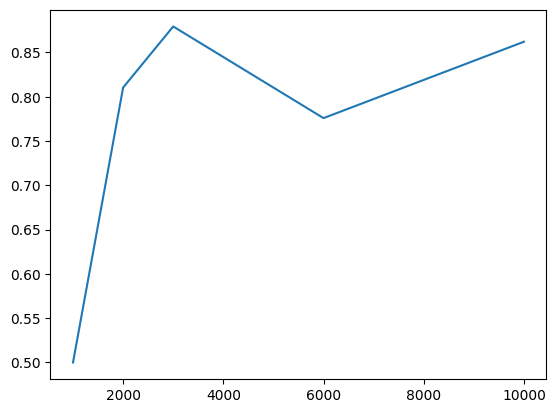

In [119]:
# The value of this code changes with each run; that's the pattern I saw, but I don't quite understand why it happens, maybe because of the SGD.
num_iter = [1000, 2000, 3000, 6000, 10000]
scores = []

for i in num_iter:

    clf = SGDClassifier(loss="log_loss", penalty="l2", max_iter=i)
    clf.fit(train_img, train_lbl)
    y_pred = clf.predict(test_img)
    score = clf.score(test_img, test_lbl)

    scores.append(score)
    print(score)

plt.plot(num_iter, scores)